# Part 1:

In [102]:
import pandas as pd

import matplotlib.pyplot as plt

plt.close("all")

# since file was formatted as .data, column names had to manually listed when converting file into a dataframe
data = pd.read_csv("abalone.data", names=["Sex", "Length" , "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"])

# displays first 5 rows of dataset
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [103]:
# displays datatypes and missing values of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB



The data.info() function shows that this dataset does not contain any missing values. There will not be a need to remove rows from the dataset or to fill in values. The string datatype of the dataset is for the 'Sex' feature.


In [104]:
# displays statistical information about dataset
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000



The above displays the result of data.describe(). As was already shown with the data.info() funciton, the count row of the table shows that none of the 4177 rows of the dataset have missing values as all columns have 4177 values. The table provides mean values for each feature, their standard deviation values, as well as their min and max values. In addition the table displays the Q1, Q2, and Q3 values for each feature (25%, 50%, and 75%). By looking at the std values, it appears that the data in most of the features are grouped closely together (low dispersion). By comparing the difference between Q3 - Q2 and Q2 - Q1 for each feature, we can see that that the data values are somewhat evenly dispersed. Since each features Q2 value is fairly close to its mean value, it appears as though the data set has a symmetrical distribution.


In [105]:
#creating a correlation matrix
corr_matrix = data.corr() 

In [106]:
# checking the correlation between the label and each feature
corr_matrix["Rings"].sort_values(ascending=False)

Rings             1.000000
Shell weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole weight      0.540390
Viscera weight    0.503819
Shucked weight    0.420884
Name: Rings, dtype: float64

Because each of the above values above are very close to the number 1, we can see that all of the features have a strong positive correlation with the data label

In [107]:
# Creating a dataframe which contains only the "Rings" dataset label
rings = data["Rings"]

In [108]:
# removing label from dataset, display dataset without label
data = data.drop(columns=["Rings"])
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


<AxesSubplot:title={'center':'Box Plot of Dataset'}>

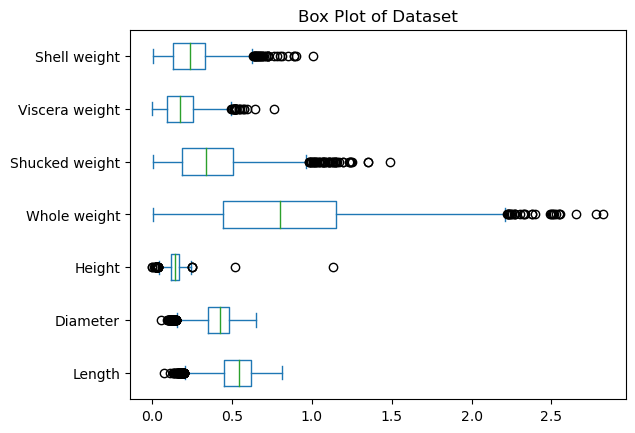

In [109]:
# creating box plots to show outliers in dataset
data.plot.box(vert=False, title="Box Plot of Dataset")

The box plots above shows all of the outliers for each feature as a black circle. Each feature has outliers which need to be removed from the set before being used to train an algorithm.

In [84]:
# creates copy of dataframe so original dataset data is not lost
df = data

# iterate through the dataset columns and remove outliers from dataset 
for column in data:
    
    # skips "Sex" feature as it is a categorical string value 
    if column == "Sex":
        continue
        
    else: 
        
        #calucates acceptable range for each feature
        
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
    
        Lower_Fence = Q1 - (1.5 * IQR)
        Upper_Fence = Q3 + (1.5 * IQR)
        
        df = df[~(( df[column] < Lower_Fence) | (df[column] > Upper_Fence))]


In [85]:
# displays statistical information of new dataset
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
count,4013.000000,4013.000000,4013.000000,4013.000000,4013.000000,4013.000000,4013.000000
mean,0.524533,0.408242,0.139090,0.809481,0.350871,0.176759,0.233437
std,0.110511,0.091758,0.035588,0.445060,0.200989,0.100637,0.125749
min,0.205000,0.155000,0.040000,0.042500,0.017000,0.000500,0.013000
25%,0.450000,0.350000,0.115000,0.447500,0.189000,0.095000,0.131500
50%,0.540000,0.420000,0.140000,0.794500,0.334000,0.169000,0.230000
75%,0.610000,0.480000,0.165000,1.133000,0.493500,0.246500,0.320000
max,0.760000,0.600000,0.240000,2.127500,0.960000,0.480500,0.605000


<AxesSubplot:title={'center':'Box Plot of Dataset Without Outliers'}>

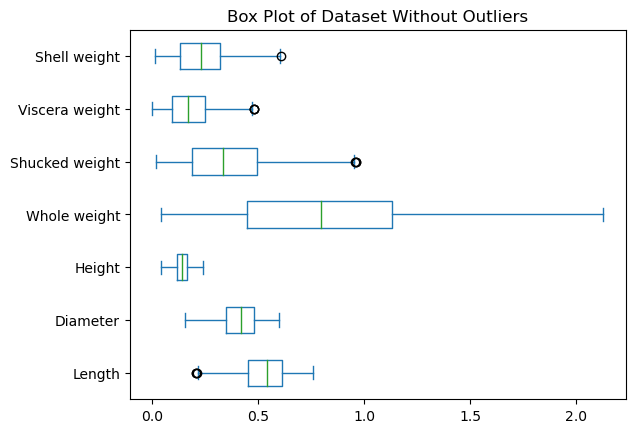

In [86]:
df.plot.box(vert=False, title="Box Plot of Dataset Without Outliers")

While it does appear that a few outliers exist in the new dataset (unsure why this is), 164 rows containing outliers have been removed from the orginal dataset.

# Part 2

In [87]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000


I gave ChatGPT the above information and asked it what it could tell me about my dataset. This is its response:


The table provides descriptive statistics for each variable of the dataset, including:

Length: the average length of the abalone in the dataset is 0.523992, with a minimum of 0.075000 and a maximum of 0.815000.
Diameter: the average diameter of the abalone in the dataset is 0.407881, with a minimum of 0.055000 and a maximum of 0.650000.
Height: the average height of the abalone in the dataset is 0.139516, with a minimum of 0.000000 and a maximum of 1.130000.
Whole weight: the average weight of the whole abalone in the dataset is 0.828742, with a minimum of 0.002000 and a maximum of 2.825500.
Shucked weight: the average weight of the shucked abalone in the dataset is 0.359367, with a minimum of 0.001000 and a maximum of 1.488000.
Viscera weight: the average weight of the viscera (guts) of the abalone in the dataset is 0.180594, with a minimum of 0.000500 and a maximum of 0.760000.
Shell weight: the average weight of the shell of the abalone in the dataset is 0.238831, with a minimum of 0.001500 and a maximum of 1.005000.
Rings: the average number of rings (age) of the abalone in the dataset is 9.933684, with a minimum of 1.000000 and a maximum of 29.000000.
The count shows that there are 4177 observations for each variable, meaning there are 4177 abalones in the dataset.

The standard deviation (std) measures the amount of variation or dispersion of the data from the mean, and it shows how spread out the values are for each variable.

The quartiles (25%, 50%, and 75%) divide the dataset into four equal parts, and they indicate the values below which a given percentage of the data falls.

These descriptive statistics can provide a quick overview of the dataset, including the range, distribution, and central tendency of each variable. They can also help identify potential outliers or anomalies in the data.


While I didn't learn anything new from this output, I am quite blown away with how well of a job it did. I am even more curious as to how it knew the dataset had to do with abalones. Nothing in my input states this. This tool is unbelievable. 


I asked ChatGPT "what would be the best way to plot my data to perform data exploration?". This is its response:

The best way to plot your data depends on the nature of your data and the specific research questions you are trying to answer. However, some common plots that can help with data exploration include:

Histograms: A histogram is a graphical representation of the distribution of numerical data. It shows how many observations fall into different ranges or bins of values for a given variable. Histograms can help identify the shape of the distribution, such as whether it is skewed or symmetric, and if there are any outliers.

Box plots: A box plot is a standardized way of displaying the distribution of numerical data based on five summary statistics: the minimum, the maximum, the median, and the first and third quartiles. Box plots can help identify outliers, the spread of the data, and whether the distribution is skewed.

Scatter plots: A scatter plot is a graph that displays the relationship between two numerical variables. It can help identify patterns or trends in the data, as well as potential outliers.

Heatmaps: A heatmap is a graphical representation of data where values are represented by colors. Heatmaps can be useful when exploring relationships between multiple variables and can help identify areas of high and low values.

Pair plots: A pair plot is a matrix of scatter plots, histograms, or other plots that shows the pairwise relationships between multiple variables. Pair plots can help identify correlations between variables and potential outliers.

Overall, a combination of different plots can be helpful to explore the data from different angles and gain a better understanding of the patterns and relationships in the data.

While my question was prehaps a bit too vague, nothing new was pointed out here. The response did provide an interesting overview to reference when needing to plot data in the future though.


Finally, I asked ChatGPT "What is the best way to remove outliers from a pandas dataframe?". This is its response: 


what is the best way to remove outliers from a pandas dataframe?

There is no one definitive way to remove outliers from a pandas dataframe, as the best method depends on the nature of the data and the research question. However, here are a few common approaches:

Z-score method: The Z-score is a measure of how many standard deviations a data point is from the mean. Any data point with a Z-score greater than a specified threshold (usually 2 or 3) can be considered an outlier. You can calculate the Z-score for each data point using the scipy.stats module, and then remove any rows that have a Z-score greater than the threshold.

IQR method: The interquartile range (IQR) is a measure of the spread of the data that is less sensitive to outliers than the standard deviation. Any data point outside the range of the first quartile minus 1.5 times the IQR or the third quartile plus 1.5 times the IQR can be considered an outlier. You can calculate the IQR and quartiles using the pandas module and then remove any rows that fall outside the range.

Visual inspection: Sometimes, outliers can be identified by visual inspection of the data. You can create various plots of the data and look for any points that are far from the rest of the data. Once identified, you can remove those rows from the dataframe.

Domain knowledge: Outliers can sometimes be the result of errors or data entry mistakes, but they can also be genuine data points that are important for understanding the data. In some cases, it may be appropriate to remove outliers based on expert knowledge of the subject matter.

It is important to note that removing outliers can have a significant impact on the results of your analysis, and it should be done judiciously and with an understanding of the potential consequences. Additionally, it is often a good practice to keep track of any data points that are removed and the reasons for their removal.

This response was interesting as I did learn something new. I did not know about the scipy.stats module for removing outliers using the Z-Score method. While I believe that the IQR method worked well for this assignment, I might need to try this in the future.  


I am amazed with ChatGPT and how well it was able to answer my questions. I need to continue to play around with this moving forward and work on framing my questions better. I learned about the scipy.stats method for removing outliers from ChatGPT today and have great general information to reference as well. I think this tool will be very useful to me when checking for additional insights in the future.